In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from tqdm import tqdm_notebook

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
with open('comments_full.json', encoding = 'utf-8') as json_file:
    data = json.load(json_file)

In [3]:
df = pd.DataFrame.from_dict(data, orient='columns')

In [4]:
df.head()

,type_comment,date_comment,text_comment,name_movie
0,good,19 апреля 2019 | 16:02,"Наверное, когда один человек отводит себе в фи...",Воин
1,good,05 июня 2019 | 14:30,2 июня вышла в свет первая часть фильма о воин...,321-я сибирская
2,good,07 января 2016 | 15:34,Тяжелая судьба Вольфганга Амадея Моцарта легла...,Моцарт. Рок-опера
3,good,05 января 2016 | 03:52,"Эх, видит бог, я мало что смыслю в рецензиях и...",Моцарт. Рок-опера
4,good,14 августа 2015 | 17:25,Прошло уже три десятка лет после премьеры леге...,Моцарт. Рок-опера


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552671 entries, 0 to 552670
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   type_comment  552671 non-null  object
 1   date_comment  552671 non-null  object
 2   text_comment  552671 non-null  object
 3   name_movie    552671 non-null  object
dtypes: object(4)
memory usage: 16.9+ MB


всего у нас 552 671 рецензии

In [6]:
df['type_comment'].value_counts()

good       362851
neutral    101567
bad         88253
Name: type_comment, dtype: int64

<AxesSubplot:>

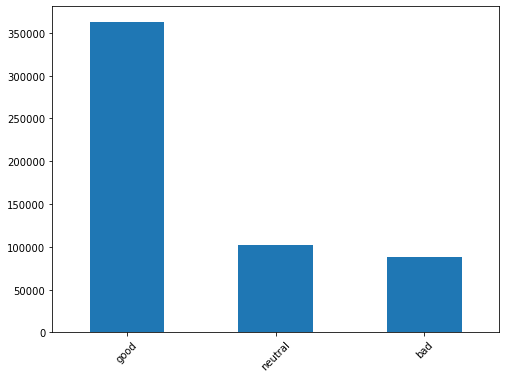

In [7]:
df['type_comment'].value_counts().plot(kind='bar', rot=45, figsize=(8, 6))

из графика видно что распределение по типу рецензий неравномерное

<AxesSubplot:>

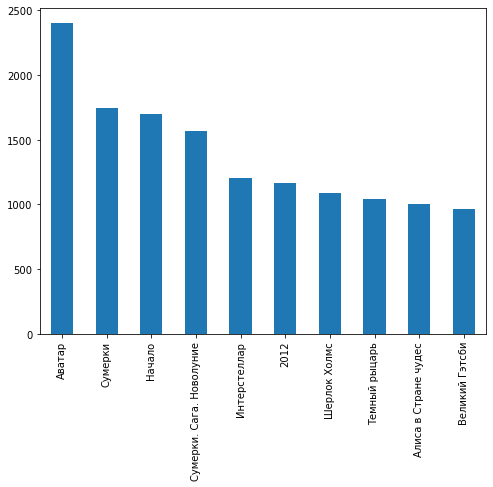

In [9]:
df['name_movie'].value_counts()[:10].plot(kind='bar', rot=90, figsize=(8, 6))

наибольшее количество рецензий имеент Аватар - оно и понятно, некоторое время это был самый кассовый фильм в мире

In [10]:
df['name_movie'].value_counts()[:10]

Аватар                      2400
Сумерки                     1746
Начало                      1697
Сумерки. Сага. Новолуние    1566
Интерстеллар                1200
2012                        1164
Шерлок Холмс                1084
Темный рыцарь               1045
Алиса в Стране чудес        1000
Великий Гэтсби               964
Name: name_movie, dtype: int64

In [11]:
df['name_movie'].nunique()

10106

имеется рецензий на 10 106 фильмов

In [12]:
df[df.duplicated(['text_comment'], keep=False)]

,type_comment,date_comment,text_comment,name_movie


In [ ]:
# df = df.drop_duplicates(subset=['text_comment'])

In [ ]:
# df[df.duplicated(['text_comment'], keep=False)]

In [13]:
df_good = df.loc[df['type_comment'] == 'good']
df_bad = df.loc[df['type_comment'] == 'bad']
df_neutral = df.loc[df['type_comment'] == 'neutral']

In [14]:
print('count good comments \t{}'.format(df_good.shape[0]))
print('count bad comments \t{}'.format(df_bad.shape[0]))
print('count neutral comments \t{}'.format(df_neutral.shape[0]))

count good comments 	362851
count bad comments 	88253
count neutral comments 	101567


In [15]:
df_good_test = df_good.sample(1000)
df_bad_test = df_bad.sample(1000)
df_neutral_test = df_neutral.sample(1000)

In [16]:
df_final_test = pd.concat([df_good_test, df_bad_test, df_neutral_test])

In [17]:
df_final_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 39895 to 140926
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type_comment  3000 non-null   object
 1   date_comment  3000 non-null   object
 2   text_comment  3000 non-null   object
 3   name_movie    3000 non-null   object
dtypes: object(4)
memory usage: 117.2+ KB


In [18]:
df_final_test['type_comment'].value_counts()

good       1000
bad        1000
neutral    1000
Name: type_comment, dtype: int64

In [19]:
df_final_test['text_comment'] = df_final_test['text_comment'].map(lambda x: x.replace(r'\n',''))

In [21]:
from sklearn.utils import shuffle
df_final_test = shuffle(df_final_test)

In [22]:
with open('comments_test_1000_all.json', 'w', encoding='utf-8') as file:
    df_final_test.to_json(file, force_ascii=False, orient="records")

In [25]:
df_final_test_bad_good = pd.concat([df_good_test, df_bad_test])

In [26]:
df_final_test_bad_good.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 39895 to 411028
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type_comment  2000 non-null   object
 1   date_comment  2000 non-null   object
 2   text_comment  2000 non-null   object
 3   name_movie    2000 non-null   object
dtypes: object(4)
memory usage: 78.1+ KB


In [27]:
df_final_test_bad_good['type_comment'].value_counts()

good    1000
bad     1000
Name: type_comment, dtype: int64

In [28]:
df_final_test_bad_good['text_comment'] = df_final_test_bad_good['text_comment'].map(lambda x: x.replace(r'\n',''))

In [29]:
df_final_test_bad_good = shuffle(df_final_test_bad_good)

In [30]:
with open('comments_test_1000_bad_good.json', 'w', encoding='utf-8') as file:
    df_final_test_bad_good.to_json(file, force_ascii=False, orient="records")

In [31]:
df_good = df_good.sample(88253)
# df_bad_test = df_bad.sample(1000)
df_neutral = df_neutral.sample(88253)
# df_bad

In [32]:
df_final_bad_good = pd.concat([df_good, df_bad])
df_final_all = pd.concat([df_good, df_neutral, df_bad])

In [33]:
df_final_bad_good.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176506 entries, 17274 to 552670
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   type_comment  176506 non-null  object
 1   date_comment  176506 non-null  object
 2   text_comment  176506 non-null  object
 3   name_movie    176506 non-null  object
dtypes: object(4)
memory usage: 6.7+ MB


In [34]:
df_final_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264759 entries, 17274 to 552670
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   type_comment  264759 non-null  object
 1   date_comment  264759 non-null  object
 2   text_comment  264759 non-null  object
 3   name_movie    264759 non-null  object
dtypes: object(4)
memory usage: 10.1+ MB


In [35]:
df_final_bad_good['type_comment'].value_counts()

bad     88253
good    88253
Name: type_comment, dtype: int64

In [36]:
df_final_all['type_comment'].value_counts()

bad        88253
neutral    88253
good       88253
Name: type_comment, dtype: int64

In [37]:
df_final_bad_good['text_comment'] = df_final_bad_good['text_comment'].map(lambda x: x.replace(r'\n',''))
df_final_all['text_comment'] = df_final_all['text_comment'].map(lambda x: x.replace(r'\n',''))

In [38]:
df_final_bad_good = shuffle(df_final_bad_good)
df_final_all = shuffle(df_final_all)

In [39]:
with open('comments_bad_good.json', 'w', encoding='utf-8') as file:
    df_final_bad_good.to_json(file, force_ascii=False, orient="records")

In [40]:
with open('comments_all.json', 'w', encoding='utf-8') as file:
    df_final_all.to_json(file, force_ascii=False, orient="records")

что за разбиение было сделано в конце?

1. были выделены рецензии по типам в отдельные dataframe.

2. сделаны два небольших файла comments_test_1000_bad_good и comments_test_1000_all на которых планируется первоночально потренировать модель и чтобы это не занимало "вечность"

3. сделаны два файла comments_all и comments_bad_good, на которых планируется запустить модель - тут планируется сделать основной результат.

P.S. почему было сделано по два файла? 
есть предположение что нейстральные рецензии будут "мешать", поэтому хочется запустить модель и с ними, и без них.